In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425
from scipy.stats import norm,gamma,chi2, expon, uniform, t

from scipy.special import expit

In [3]:
# Load CSV file into a DataFrame
df = pd.read_csv('data/annual-pm25-emissions-from-wildfires.csv')
df['Annual PM2.5 emissions from wildfires'] /= 10**6
df.head()

,Entity,Code,Year,Annual PM2.5 emissions from wildfires
0,Afghanistan,AFG,2003,0.002039
1,Afghanistan,AFG,2004,0.001456
2,Afghanistan,AFG,2005,0.000942
3,Afghanistan,AFG,2006,0.001483
4,Afghanistan,AFG,2007,0.001731


In [4]:
df['Code'] = df['Code'].fillna(df['Entity'])

# Pivot the DataFrame to reshape it
pivot_df = df.pivot_table(index=['Entity', 'Code'], columns='Year', values='Annual PM2.5 emissions from wildfires').reset_index()

# Rounding off the emission values to two digits after the decimal point
pivot_df = pivot_df.round(2)

# Renaming the columns for better readability
pivot_df.columns.name = None  # Removing the name of the columns index
#pivot_df.columns = pivot_df.columns.astype(str)  # Converting column names to string
pivot_df = pivot_df.rename(columns={'Entity': 'Entity', 'Code': 'Code'})  # Renaming Entity and Code columns

pivot_df.drop(columns=[2024], inplace=True)


#print(pivot_df)
pivot_df

,Entity,Code,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Africa,Africa,10.73,10.37,10.94,9.91,11.14,10.92,10.29,10.24,...,9.75,10.36,11.27,8.47,8.42,7.96,7.46,8.25,7.98,7.72
2,Akrotiri and Dhekelia,OWID_AKD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Aland Islands,ALA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Albania,ALB,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Western Sahara,ESH,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
254,World,OWID_WRL,36.57,31.34,30.57,29.47,30.39,28.02,25.46,26.92,...,28.49,32.49,27.20,24.12,23.13,27.63,22.83,27.18,20.31,32.51
255,Yemen,YEM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.03,0.02,0.02,0.03,0.02,0.01,0.02
256,Zambia,ZMB,0.73,0.68,0.73,0.66,0.73,0.78,0.65,0.75,...,0.71,0.77,0.74,0.57,0.58,0.57,0.45,0.52,0.58,0.48


# PM2.5 Emissions from Wildfires Across Different Regions

This visualization displays the annual PM2.5 emissions from wildfires for India, the United States, and the World over the years. Each subplot represents a region, showing the trend of emissions over time. The x-axis represents the years, while the y-axis represents the emissions measured in million metric tons. Data for India is represented by the country code 'IND', for the United States by 'USA', and for the World by 'OWID_WRL'.


In [22]:


# Filter the DataFrame for India with code 'IND'
india_df = pivot_df[(pivot_df['Entity'] == 'India') & (pivot_df['Code'] == 'IND')]

# Filter the DataFrame for United States with code 'USA'
usa_df = pivot_df[(pivot_df['Entity'] == 'United States') & (pivot_df['Code'] == 'USA')]

# Filter the DataFrame for World with code 'OWID_WRL'
world_df = pivot_df[(pivot_df['Entity'] == 'World') & (pivot_df['Code'] == 'OWID_WRL')]

africa_df = pivot_df[(pivot_df['Entity'] == 'Africa') & (pivot_df['Code'] == 'Africa')]

# Drop 'Entity' and 'Code' columns as they are no longer needed for plotting
india_df = india_df.drop(['Entity', 'Code'], axis=1)
usa_df = usa_df.drop(['Entity', 'Code'], axis=1)
world_df = world_df.drop(['Entity', 'Code'], axis=1)
africa_df = africa_df.drop(['Entity', 'Code'], axis=1)

# Transpose the DataFrames to have years as rows and emissions as columns
india_df = india_df.T
usa_df = usa_df.T
world_df = world_df.T
africa_df = africa_df.T

# # Plotting the histograms for India, the United States, and the World
# fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# # Plot for India
# axes[0].bar(india_df.index, india_df.values.flatten(), color='blue')
# axes[0].set_ylabel('Emissions(in Million)')
# axes[0].set_title('PM2.5 Emissions from Wildfires in India (Code: IND)')
# axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# # Plot for the United States
# axes[1].bar(usa_df.index, usa_df.values.flatten(), color='green')
# axes[1].set_ylabel('Emissions(in Million)')
# axes[1].set_title('PM2.5 Emissions from Wildfires in the United States (Code: USA)')
# axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# # Plot for the World
# axes[2].bar(world_df.index, world_df.values.flatten(), color='orange')
# axes[2].set_xlabel('Year')
# axes[2].set_ylabel('Emissions(in Million)')
# axes[2].set_title('PM2.5 Emissions from Wildfires in the World (Code: OWID_WRL)')
# axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


### PM2.5 Emissions from Wildfires in India

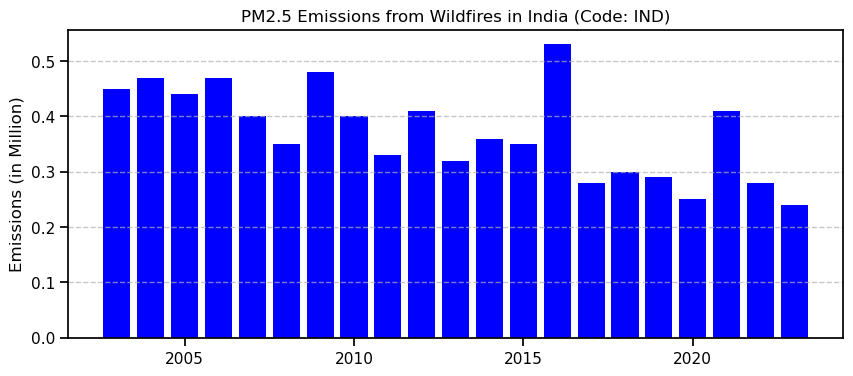

In [16]:
# Plot for India
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust figsize as needed
ax.bar(india_df.index, india_df.values.flatten(), color='blue')
ax.set_ylabel('Emissions (in Million)')
ax.set_title('PM2.5 Emissions from Wildfires in India (Code: IND)')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Wildfires in Uttarakhand, India (2016)

In 2016, India experienced a significant wildfire outbreak in the state of Uttarakhand, particularly in the forests of the Himalayan region. The wildfires raged for several weeks, affecting vast areas of forest cover and leading to considerable ecological and environmental damage. The severity of the wildfires prompted a massive response from authorities, including firefighters, the Indian Air Force, and other disaster management agencies.

The exact causes of the wildfires in Uttarakhand in 2016 were multifaceted, but they were exacerbated by factors such as prolonged dry weather conditions, high temperatures, and human activities like land clearing, agricultural burning, and the use of fire for forest management practices.

The wildfires not only posed significant risks to the forest ecosystem and biodiversity but also impacted nearby human settlements and infrastructure. Thousands of hectares of forest land were affected, and the smoke from the fires contributed to air pollution in the region, affecting public health.

#### Some images from Uttarakhand wildfire
|  |  |  |
|---------|---------|---------|
| ![Image 1](images/I2016_4.jpeg) | ![Image 2](images/I2016_5.jpeg) | ![Image 3](images/I2016_3.avif) |

---

**Source & For more information:** https://en.wikipedia.org/wiki/2016_Uttarakhand_forest_fires


### PM2.5 Emissions from Wildfires in the United States

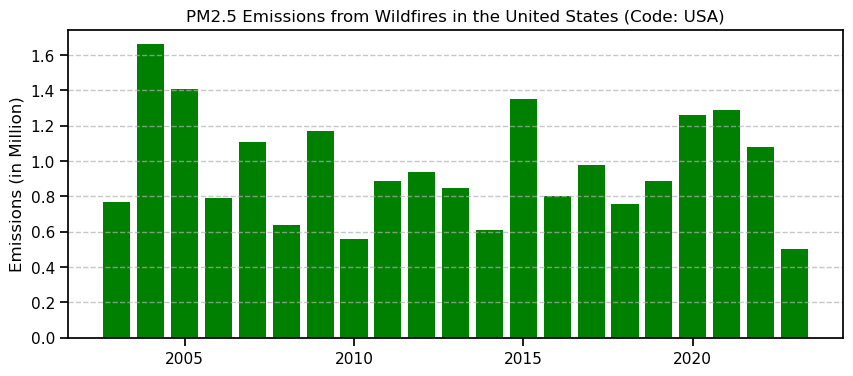

In [18]:
fig, ax = plt.subplots(figsize=(10, 4))  
ax.bar(usa_df.index, usa_df.values.flatten(), color='green')
ax.set_ylabel('Emissions (in Million)')
ax.set_title('PM2.5 Emissions from Wildfires in the United States (Code: USA)')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Okanogan Complex Fire: Washington State's Largest Wildfire (2015)

In 2015, Washington state faced one of its most devastating wildfires in history with the Okanogan Complex Fire. Here's an overview of the key details:

- **Size:** The Okanogan Complex Fire grew to become the largest wildfire in Washington's history, covering more than 256,567 acres. This surpassed the previous record set by the Carlton Complex fires in the preceding year, which burned 256,108 acres.

- **Composition:** Initially, the complex comprised five separate fires: the Twisp River fire, the Lime Belt fire, the Beaver Lake fire, the Blue Lake fire, and the Tunk Block fire. Subsequently, the Lime Belt, Beaver Lake, and Blue Lake fires merged into one, while the Tunk Block fire remained distinct.

- **Extent:** The two main branches of the fire, the merged Lime Belt fires, and the Tunk Block fire, each burned over 100,000 acres of land.

- **Causes:** The Okanogan Complex Fire was fueled by hot and dry weather conditions, exacerbated by strong winds. These factors contributed to the rapid spread and intensification of the wildfires.

- **Impacts:** The wildfire resulted in extensive destruction, consuming tens of thousands of acres of forest land and causing significant damage to homes, structures, and infrastructure. The severity of the blaze prompted widespread evacuations and posed significant challenges to firefighting efforts.

- **Response:** Firefighting efforts to contain the Okanogan Complex Fire involved a coordinated response from various agencies, including local, state, and federal firefighters. Assistance was also sought from neighboring states to combat the blaze. Despite these efforts, the fire burned for several weeks before it was fully contained.

The Okanogan Complex Fire serves as a poignant reminder of the devastating impact that wildfires can have on communities, ecosystems, and landscapes. It underscores the importance of proactive measures in fire management, prevention, and emergency response to mitigate the risks posed by such events.

**Source & For more information:** https://wildfiretoday.com/tag/okanagan-fire/


<div style="text-align:center;">
  <img src="images/Us_2015.webp" alt="Image 1" width="800"/>
  <p style="color: #808080; text-align:center">The red line was the fire perimeter of the Okanogan Complex at 11 p.m. PT August 19, 2015. The white line is from about 24 hours before.</p>
</div>

 



<div style="text-align:center;">
  <img src="images/Us_2015_2.webp" alt="Image 2"/>
  <p style="color: #808080; text-align:center">Okanogan Complex. Fire perimeter as of Aug. 24, 2015.</p>
</div>



### PM2.5 Emissions from Wildfires in the Africa

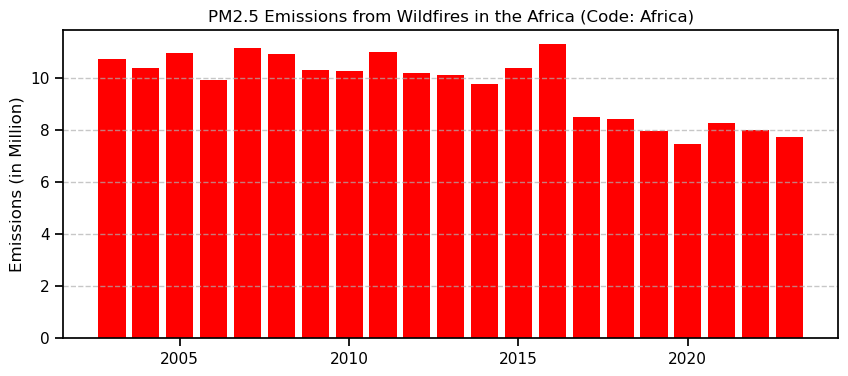

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))  
ax.bar(africa_df.index, africa_df.values.flatten(), color='red')
ax.set_ylabel('Emissions (in Million)')
ax.set_title('PM2.5 Emissions from Wildfires in the Africa (Code: Africa)')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2016 Great Smoky Mountains Wildfires and South Africa Wildfires

The 2016 Great Smoky Mountains wildfires, also known as the Gatlinburg wildfires, were a complex of wildfires that began in late November 2016. Some of the towns most impacted were Pigeon Forge and Gatlinburg, both near Great Smoky Mountains National Park. The fires claimed at least 14 lives, injured 190, and are one of the largest natural disasters in the history of Tennessee.

Additionally, up to 10,000 people were evacuated from a scenic coastal town in South Africa that was devastated by wildfires, officials said. These fires, although separate from the Gatlinburg wildfires, added to the global impact of wildfires in 2016.

Both sets of wildfires underscore the devastating consequences of such events, including loss of life, injuries, and significant damage to property and the environment.



#### Some images from Great Smoky Mountains Wildfires
|  |  |  |
|---------|---------|---------|
| ![Image 1](images/A2016_1.webp) | ![Image 2](images/A2016_2.webp) | ![Image 3](images/A2016_3.webp) |

---

**Source & for more information:** https://en.wikipedia.org/wiki/2016_Great_Smoky_Mountains_wildfires

### PM2.5 Emissions from Wildfires in the World

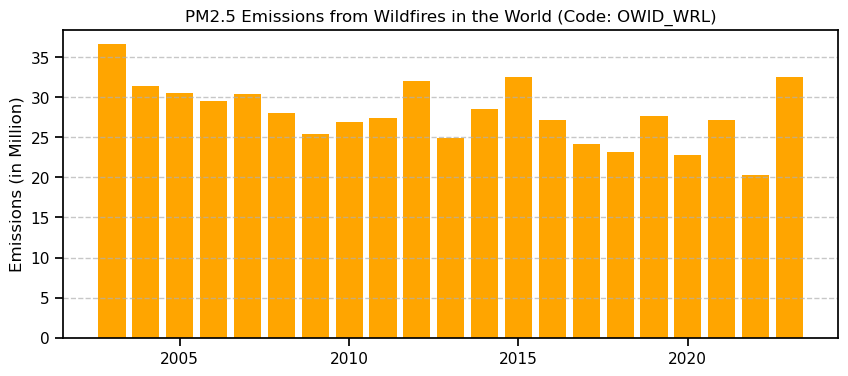

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))  
ax.bar(world_df.index, world_df.values.flatten(), color='orange')
ax.set_ylabel('Emissions (in Million)')
ax.set_title('PM2.5 Emissions from Wildfires in the World (Code: OWID_WRL)')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# PM2.5 Emissions and Distributions Comparison: India, USA, and Africa

This visualization compares the PM2.5 emissions and their distributions for India, the United States (USA), and Africa. Each subplot represents a region, showing the histogram of PM2.5 emissions along with the fitted normal, uniform, and exponential distributions. The x-axis represents PM2.5 emissions measured in million metric tons, while the y-axis represents the probability density. 

The first subplot displays the data for India, the second subplot for the USA, and the third subplot for Africa. This comparison provides insights into the distribution patterns of PM2.5 emissions across different regions.


458.33723224533014 0.17645894471612855


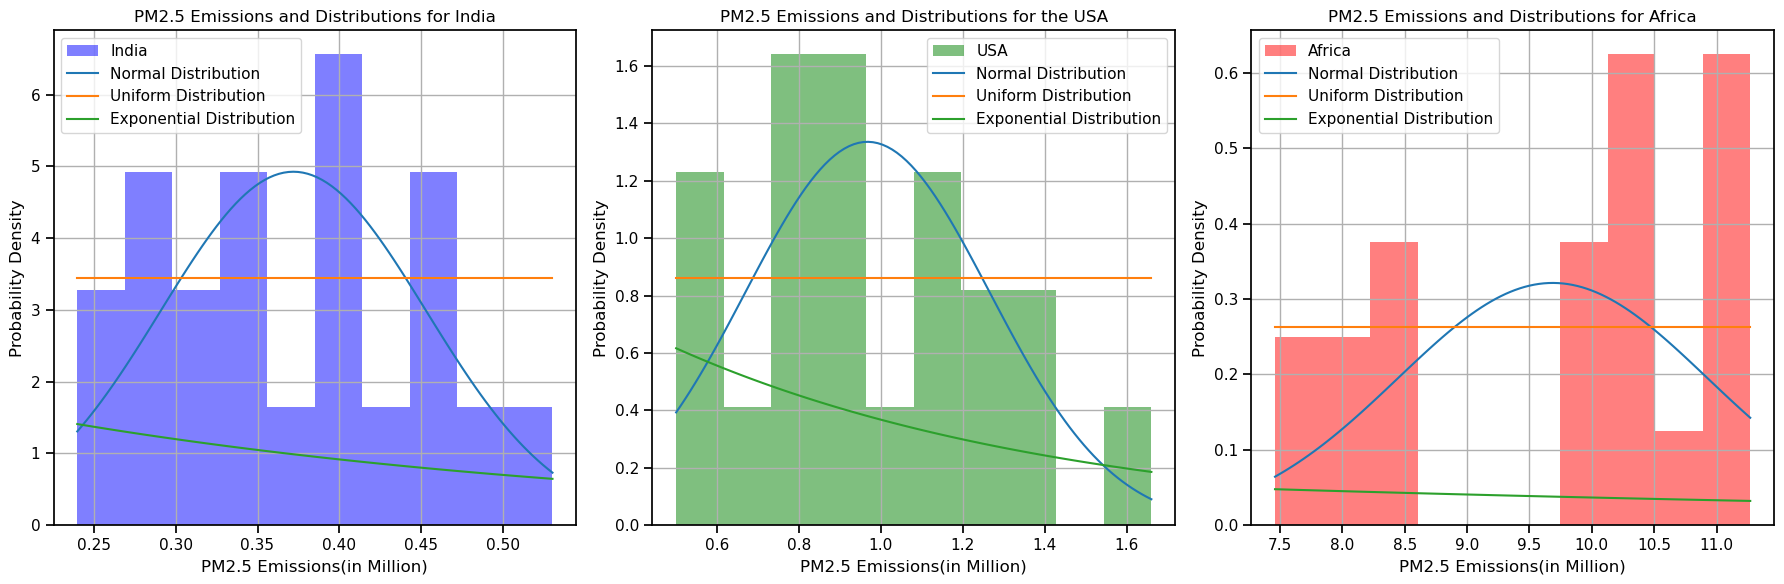

In [70]:
import numpy as np
from scipy.stats import norm, uniform, expon

# Calculate mean and standard deviation for PM2.5 emissions for India and the USA
pm25_emissions_values_india = india_df.values.flatten()
pm25_emissions_mean_india = pm25_emissions_values_india.mean()
pm25_emissions_std_india = pm25_emissions_values_india.std()

pm25_emissions_values_usa = usa_df.values.flatten()
pm25_emissions_mean_usa = pm25_emissions_values_usa.mean()
pm25_emissions_std_usa = pm25_emissions_values_usa.std()

# Generate data for the normal distribution curve for India
x_india = np.linspace(min(pm25_emissions_values_india), max(pm25_emissions_values_india), 100)
y_normal_india = norm.pdf(x_india, pm25_emissions_mean_india, pm25_emissions_std_india)
y_uniform_india = uniform.pdf(x_india, loc=min(pm25_emissions_values_india), scale=max(pm25_emissions_values_india)-min(pm25_emissions_values_india))
y_exponential_india = expon.pdf(x_india, scale=pm25_emissions_mean_india)

# Generate data for the normal distribution curve for the USA
x_usa = np.linspace(min(pm25_emissions_values_usa), max(pm25_emissions_values_usa), 100)
y_normal_usa = norm.pdf(x_usa, pm25_emissions_mean_usa, pm25_emissions_std_usa)
y_uniform_usa = uniform.pdf(x_usa, loc=min(pm25_emissions_values_usa), scale=max(pm25_emissions_values_usa)-min(pm25_emissions_values_usa))
y_exponential_usa = expon.pdf(x_usa, scale=pm25_emissions_mean_usa)

# Calculate mean and standard deviation for PM2.5 emissions for the World
pm25_emissions_values_world = world_df.values.flatten()
pm25_emissions_mean_world = pm25_emissions_values_world.mean()
pm25_emissions_std_world = pm25_emissions_values_world.std()

#pm25_emissions_world_alpha_mom = pm25_emissions_mean_world ** 2 / pm25_emissions_std_world
#pm25_emissions_world_beta_mom = pm25_emissions_std_world / pm25_emissions_mean_world

# Calculate shape and scale parameters for the gamma distribution for the World
pm25_emissions_world_alpha, _, pm25_emissions_world_beta = gamma.fit(pm25_emissions_values_world)

print(pm25_emissions_world_alpha, pm25_emissions_world_beta)

# Generate data for the normal distribution curve for the World
x_world = np.linspace(min(pm25_emissions_values_world), max(pm25_emissions_values_world), 100)
y_normal_world = norm.pdf(x_world, pm25_emissions_mean_world, pm25_emissions_std_world)
y_uniform_world = uniform.pdf(x_world, loc=min(pm25_emissions_values_world), scale=max(pm25_emissions_values_world)-min(pm25_emissions_values_world))
y_exponential_world = expon.pdf(x_world, scale=pm25_emissions_mean_world)
y_gamma_world = gamma.pdf(x_world, a=pm25_emissions_world_alpha, scale=pm25_emissions_world_beta)

# Plotting the histograms and distributions for India, the USA, and the World
plt.figure(figsize=(18, 6))

# Plot histogram and distributions for India
plt.subplot(1, 3, 1)
plt.hist(pm25_emissions_values_india, bins=10, density=True, color='blue', alpha=0.5, label='India')
plt.plot(x_india, y_normal_india, label='Normal Distribution')
plt.plot(x_india, y_uniform_india, label='Uniform Distribution')
plt.plot(x_india, y_exponential_india, label='Exponential Distribution')
plt.title('PM2.5 Emissions and Distributions for India')
plt.xlabel('PM2.5 Emissions(in Million)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Plot histogram and distributions for the USA
plt.subplot(1, 3, 2)
plt.hist(pm25_emissions_values_usa, bins=10, density=True, color='green', alpha=0.5, label='USA')
plt.plot(x_usa, y_normal_usa, label='Normal Distribution')
plt.plot(x_usa, y_uniform_usa, label='Uniform Distribution')
plt.plot(x_usa, y_exponential_usa, label='Exponential Distribution')
plt.title('PM2.5 Emissions and Distributions for the USA')
plt.xlabel('PM2.5 Emissions(in Million)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
#print(min(x_usa), max(x_usa))


# plt.subplot(1, 3, 3)


# Calculate mean and standard deviation for PM2.5 emissions for Africa
pm25_emissions_values_africa = africa_df.values.flatten()
pm25_emissions_mean_africa = pm25_emissions_values_africa.mean()
pm25_emissions_std_africa = pm25_emissions_values_africa.std()

# Generate data for the normal distribution curve for Africa
x_africa = np.linspace(min(pm25_emissions_values_africa), max(pm25_emissions_values_africa), 100)
y_normal_africa = norm.pdf(x_africa, pm25_emissions_mean_africa, pm25_emissions_std_africa)
y_uniform_africa = uniform.pdf(x_africa, loc=min(pm25_emissions_values_africa), scale=max(pm25_emissions_values_africa)-min(pm25_emissions_values_africa))
y_exponential_africa = expon.pdf(x_africa, scale=pm25_emissions_mean_africa)

plt.subplot(1, 3, 3)
plt.hist(pm25_emissions_values_africa, bins=10, density=True, color='red', alpha=0.5, label='Africa')
plt.plot(x_africa, y_normal_africa, label='Normal Distribution')
plt.plot(x_africa, y_uniform_africa, label='Uniform Distribution')
plt.plot(x_africa, y_exponential_africa, label='Exponential Distribution')
plt.title('PM2.5 Emissions and Distributions for Africa')
plt.xlabel('PM2.5 Emissions(in Million)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# PM2.5 Emissions and Distributions for the World

This visualization illustrates the PM2.5 emissions and their distributions for the world. The histogram represents the distribution of PM2.5 emissions, with the orange bars indicating the frequency of emissions in million metric tons. Additionally, fitted normal, uniform, and exponential distributions are plotted to analyze the distribution patterns.

The x-axis shows PM2.5 emissions measured in million metric tons, while the y-axis represents the probability density. The fitted distributions provide insights into the statistical characteristics of PM2.5 emissions in the world, facilitating a better understanding of their distribution patterns and variability.


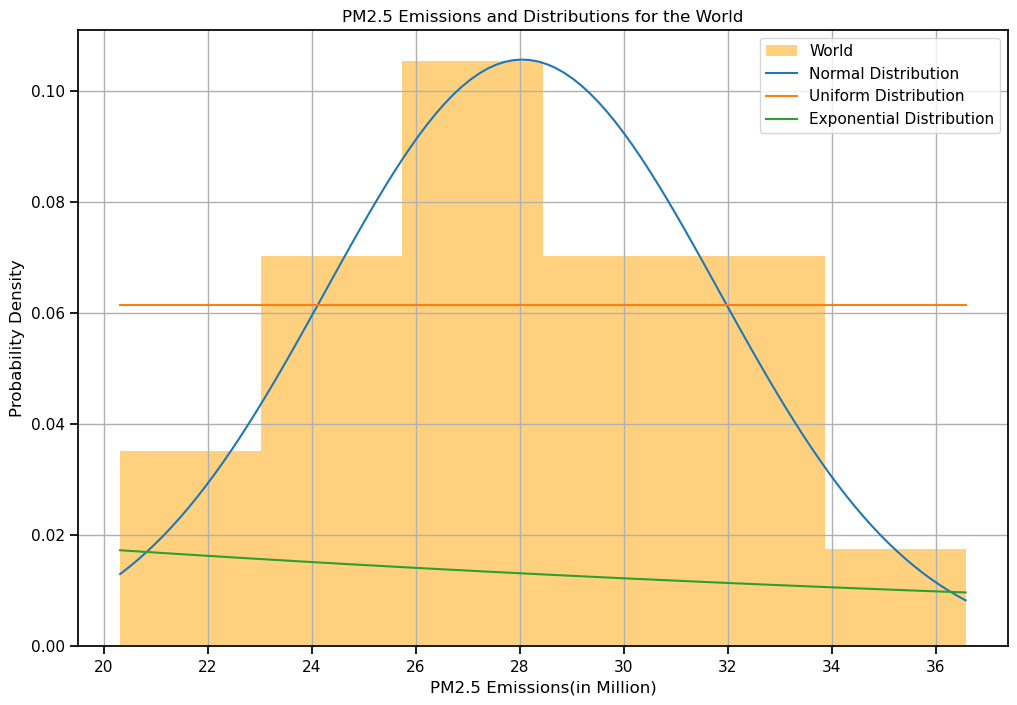

In [109]:
# Plot histogram and distributions for the World
plt.figure(figsize=(12, 8))
world_mean = pm25_emissions_values_world.mean()
world_var = pm25_emissions_values_world.var()
alpha_mom = (world_mean ** 2) / world_var
beta_mom = world_var / world_mean
world_mean, world_var, alpha_mom, beta_mom

x = np.linspace(0, max(pm25_emissions_values_world), 1000)
pdf = stats.gamma.pdf(x, alpha_mom, scale=beta_mom)

plt.hist(pm25_emissions_values_world, bins=6, density=True, color='orange', alpha=0.5, label='World')
plt.plot(x_world, y_normal_world, label='Normal Distribution')
plt.plot(x_world, y_uniform_world, label='Uniform Distribution')
#  plt.plot(x_world, y_gamma_world, label='Gamma Distribution')
plt.plot(x_world, y_exponential_world, label='Exponential Distribution')
plt.title('PM2.5 Emissions and Distributions for the World')
plt.xlabel('PM2.5 Emissions(in Million)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)


# Practical vs Theoretical Gamma Distribution(MOM)

This plot compares the practical distribution of PM2.5 emissions in the world (shown as a histogram) with the theoretical gamma distribution. The histogram represents the observed frequency of PM2.5 emissions, while the red curve illustrates the theoretical gamma distribution fitted to the data.

The x-axis denotes the value of PM2.5 emissions, while the y-axis represents the density of the distribution. The comparison between the practical and theoretical distributions helps evaluate how well the gamma distribution model fits the observed data, providing insights into the underlying statistical characteristics of PM2.5 emissions.


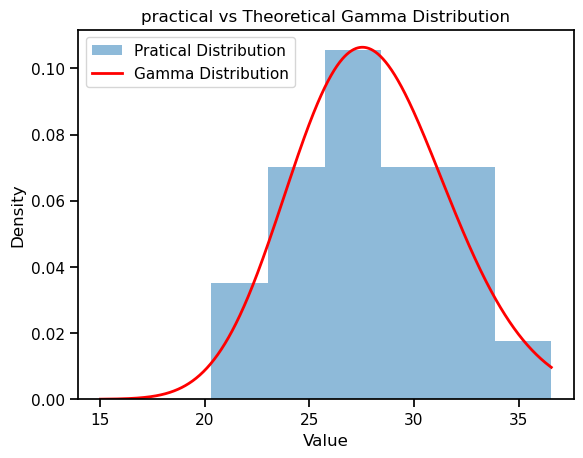

In [110]:
#MOM
import scipy.stats as stats

world_mean = pm25_emissions_values_world.mean()
world_var = pm25_emissions_values_world.var()
alpha_mom = (world_mean ** 2) / world_var
beta_mom = world_var / world_mean
world_mean, world_var, alpha_mom, beta_mom

x = np.linspace(15, max(pm25_emissions_values_world), 1000)
pdf = stats.gamma.pdf(x, alpha_mom, scale=beta_mom)

# Plot practical and theoretical distributions
plt.hist(pm25_emissions_values_world, bins=6, density=True, alpha=0.5, label='Pratical Distribution')
plt.plot(x, pdf, 'r-', lw=2, label='Gamma Distribution')
# plt.plot(x_world, y_normal_world, label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('practical vs Theoretical Gamma Distribution')
plt.legend()
plt.show()

# Bayesian simulation

Bayesian estimation: Let's pick pdfs for the  𝛾
  distribution's parameters  𝛼
  and  𝛽
 .

## Modeling Gamma parameters with a Uniform distribution

Start with the `Uniform` distribution. datagiven seems to go from 15 to 55 units, so let's pick the Uniform distribution to model the $\alpha$ parameter for our gamma function. The Uniform distribution also needs start and end parameters. We pick them to be wide enough to match the data. Then we model data with the Gamme distribution.

In [111]:
from pymc3 import Model, Uniform

with Model() as world:
    ualpha = Uniform('ualpha', lower=15, upper=40)
    ubeta = Uniform('ubeta', lower=15, upper=40)

In [112]:
from pymc3 import Gamma
with world:
    wildfire = Gamma('wildfire', alpha=ualpha, beta=ubeta, observed=pm25_emissions_values_world)

In [114]:
from pymc3 import fit

with world: 
    world_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 6,925


In [ ]:
from pymc3 import plot_posterior

plot_posterior(world_trace[100:], 
                varnames=['ualpha', 'ubeta'],
                color='#87ceeb');

In [115]:
world_trace['ualpha'].mean(), world_trace['ubeta'].mean()

(38.73979712775822, 16.234656669867505)

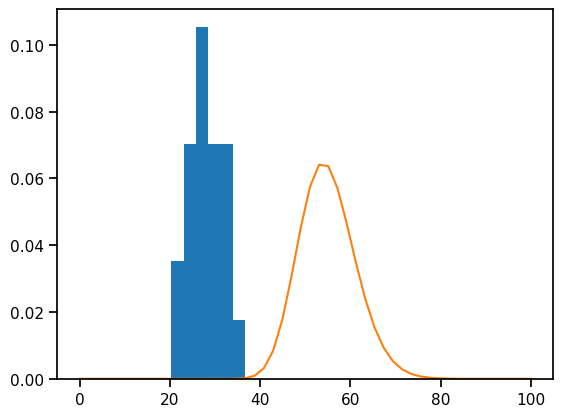

In [116]:
from scipy.stats.distributions import gamma

ualpha_posterior_mean = 38.73546139030917
ubeta_posterior_mean = 16.2165674377554

plt.hist(pm25_emissions_values_world, density=True, bins=6)
plt.plot(np.linspace(0, 100), gamma.pdf(np.linspace(0, 100), ualpha_posterior_mean, ubeta_posterior_mean))

This model did not work. As we can see in the above plot the data is left side of the gamma pdf.

## Modeling Gamma parameters with an exponential distribution 

Let's try to accelerate things and try the exponential distribution, instead. Find the right number $x$ so that the distribution covers the range of possible bmi values.  In other words, find the right value $y$ such that `Exponential.dist(1/8.5).random(size=10000)` covers from 0 to 40 for the data. Try different values out by plotting with:

```python
sns.distplot(Exponential.dist(1/8.5).random(size=10000), kde=False);
```

Then. modeling model parameters will look like this:
```
from pymc3 import Model, Exponential

with Model() as rainfall_model:
    ealpha = Exponential('ealpha', 1/8.5)
    ebeta = Exponential('ebeta', 1/8.5)
```

/var/folders/8h/lyhtt3mn2sg7w7mc0dny8v5h0000gn/T/ipykernel_45091/3615887878.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Exponential.dist(1/8.5).random(size=10000), kde=False)


<Axes: >

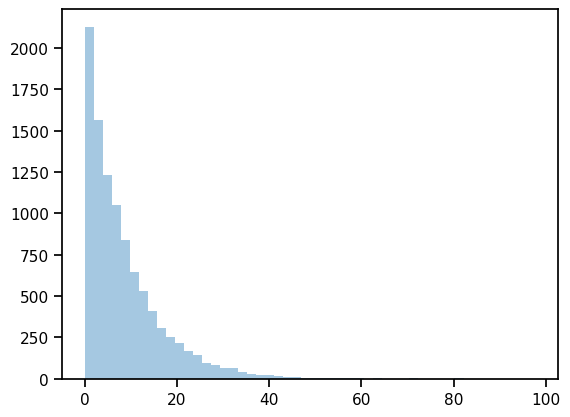

In [117]:
from pymc3 import Exponential
sns.distplot(Exponential.dist(1/8.5).random(size=10000), kde=False)

In [118]:
from pymc3 import Model, Exponential

with Model() as world_exponential:
    ealpha = Exponential('ealpha', 1/8.5)
    ebeta = Exponential('ebeta', 1/8.5)

In [119]:
from pymc3 import Gamma
with world_exponential:
    medical = Gamma('medical', alpha=ealpha, beta=ebeta, observed=pm25_emissions_values_world)

In [122]:
from pymc3 import fit

with world_exponential: 
    world_trace_exponential = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 141.14


In [123]:
world_trace_exponential['ealpha'].mean(), world_trace_exponential['ebeta'].mean()

(27.709319190087683, 1.0515703064851991)

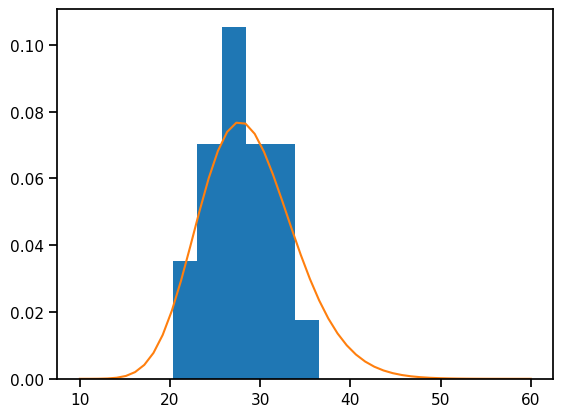

In [124]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean = bmi_trace_exponential['ealpha'].mean()
ebeta_posterior_mean = bmi_trace_exponential['ebeta'].mean()

plt.hist(pm25_emissions_values_world, density=True, bins=6)
plt.plot(np.linspace(10, 60), gamma.pdf(np.linspace(10, 60), ealpha_posterior_mean, ebeta_posterior_mean))
#plt.plot(np.linspace(10, 60), gamma.pdf(np.linspace(10, 60), alpha_mom, scale=beta_mom), 'r-')

by using the exponential distribution model we found alpha and beta values. By using bayesian simulation we plotted the gamma pdf for the given medical dataset

Comparing the gamma plot obtained by using bayesian simulation with MOM(which we already done befoe)

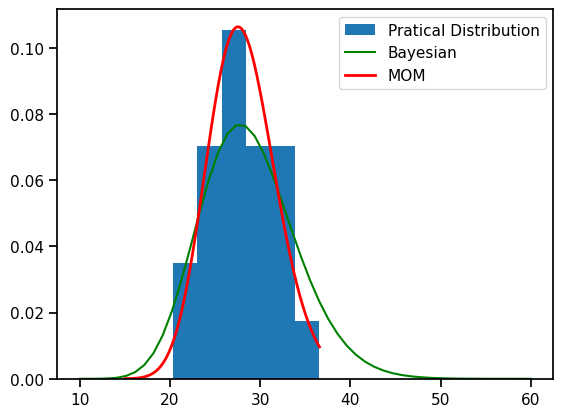

In [125]:
plt.hist(pm25_emissions_values_world, density=True, bins=6, label='Pratical Distribution')
plt.plot(np.linspace(10, 60), gamma.pdf(np.linspace(10, 60), ealpha_posterior_mean, ebeta_posterior_mean), 'g-', label='Bayesian')
plt.plot(x, pdf, 'r-', lw=2, label='MOM')
plt.legend()
plt.show()

As we can see from the above plot, based on our observation, MOM is the most suitable for the given dataset. It has a plot that covers most of the data compared to Bayesian simulation.

# Global PM 2.5 Emissions Over Time

This plot illustrates the trend of PM 2.5 emissions globally over the years. The x-axis represents the years, and the y-axis denotes the PM 2.5 emissions measured in million metric tons. Each data point is marked with a marker to indicate individual observations.


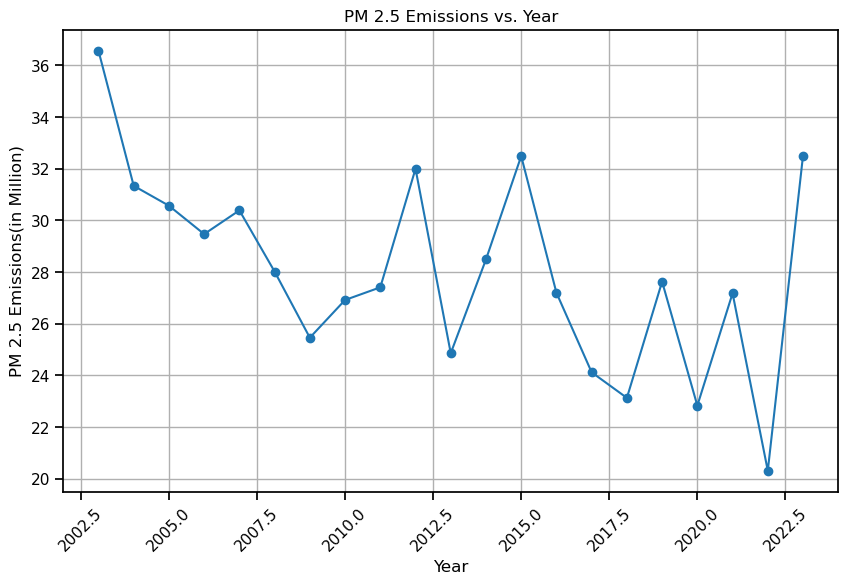

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(world_df, marker='o', linestyle='-')
plt.title('PM 2.5 Emissions vs. Year')
plt.xlabel('Year')
plt.ylabel('PM 2.5 Emissions(in Million)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()

## Filtering data for below 6 continents

In [14]:
continents = [
    'Africa', 
    'North America', 
    'South America',  
    'Asia', 
    'Europe', 
    'Oceania' 
]


year_range = range(2012, 2024)

# Dictionaries to hold filtered data
filtered_pm25_Emissions_by_continent = {}

# Filtering data for each continent and year range
for continent in continents:

    # Filter PM2.5 Emissions
    continent_pm25 = pivot_df[
        (pivot_df['Entity'] == continent) 
#         & 
#         (pm25_Emissons_Annually_df['Year'].isin(year_range))
    ]
    filtered_pm25_Emissions_by_continent[continent] = continent_pm25
    

In [19]:
#  filtered_pm25_Emissions_by_continent

# PM 2.5 Emissions Variation Across Continents Over Time

This visualization displays the variation in PM 2.5 emissions over time for different continents. Each plot represents the trend of PM 2.5 emissions for a specific continent, with markers indicating data points for individual years. The x-axis denotes the years, while the y-axis represents the PM 2.5 emissions. Each plot is labeled with the respective continent's name.


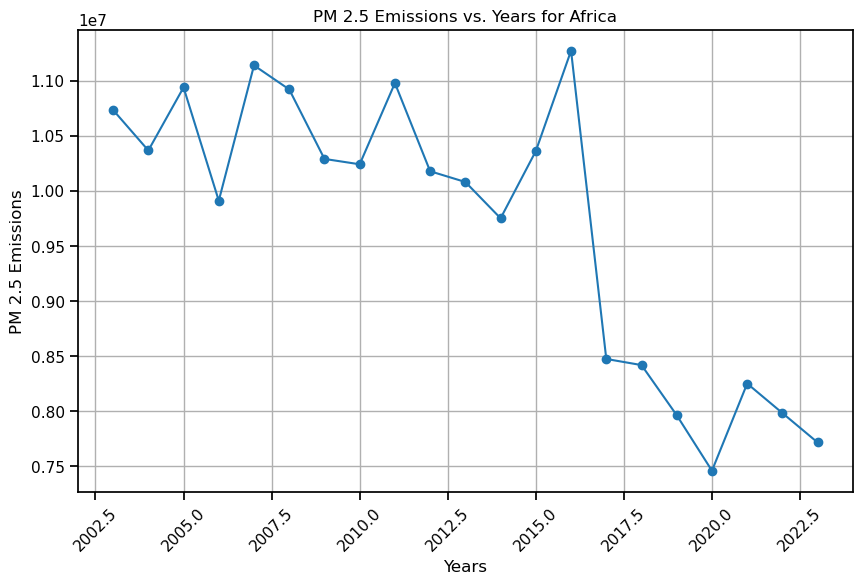

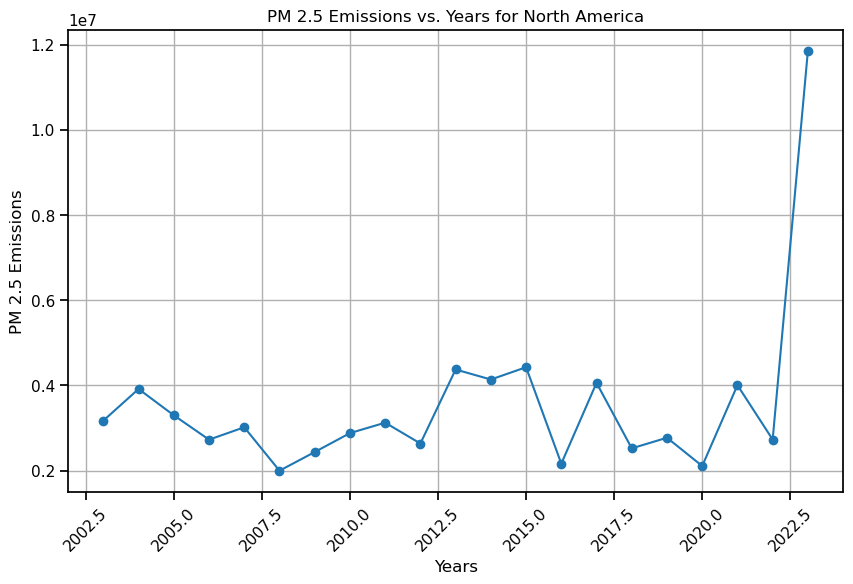

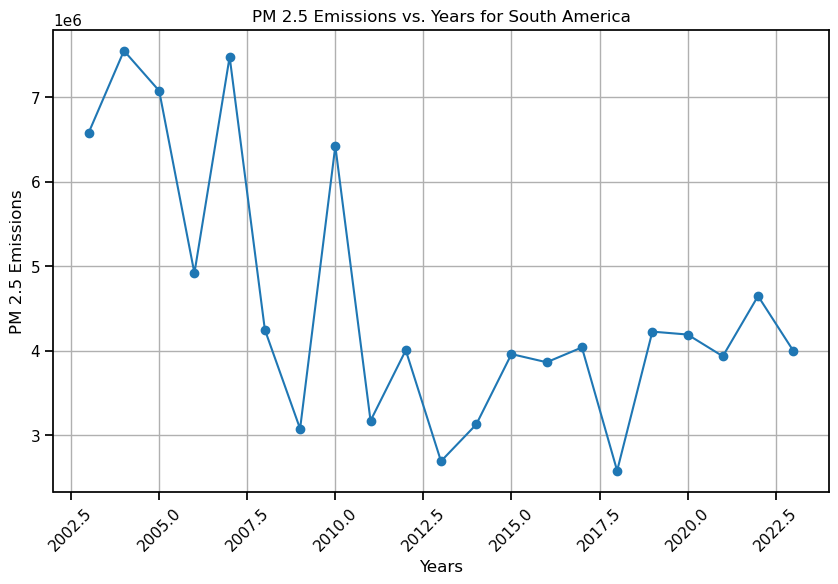

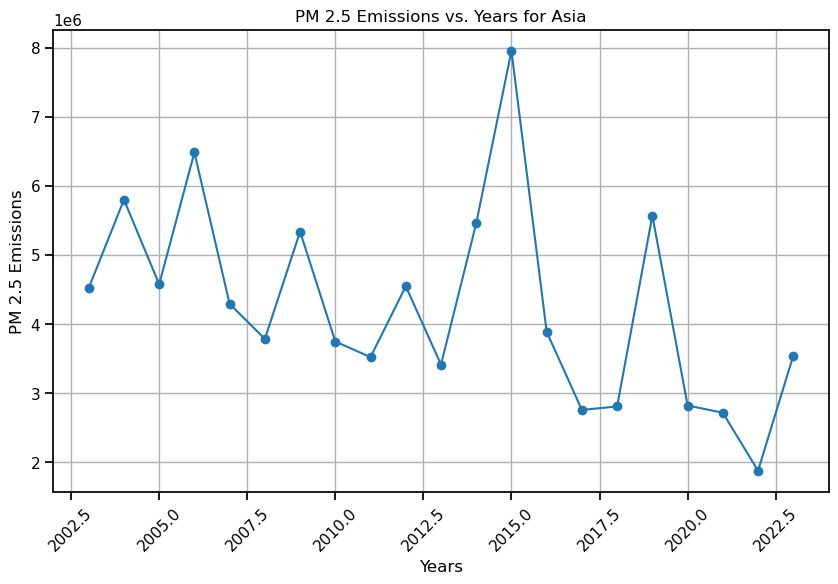

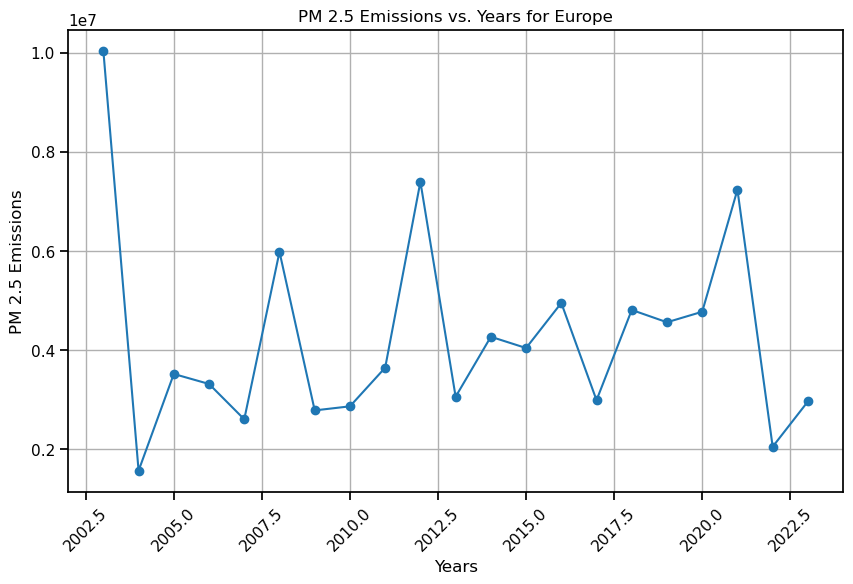

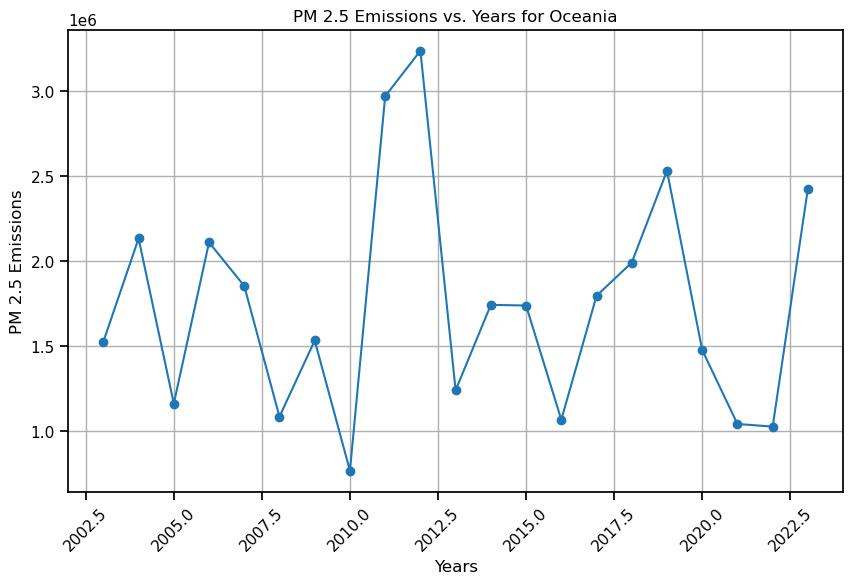

In [18]:

import matplotlib.pyplot as plt

# Plotting PM 2.5 emissions for each continent
for continent, df_pm25_emissions_by_continent in filtered_pm25_Emissions_by_continent.items():
    years = df_pm25_emissions_by_continent.columns[2:]
    emissions = df_pm25_emissions_by_continent.iloc[0, 2:].values.astype(float)  # Extracting emissions data
    plt.figure(figsize=(10, 6))
    plt.plot(years, emissions, marker='o', linestyle='-')
    plt.title(f'PM 2.5 Emissions vs. Years for {continent}')
    plt.xlabel('Years')
    plt.ylabel('PM 2.5 Emissions')
    plt.grid(True)
    plt.xticks(rotation=45)  
    plt.show()


# Comparison of PM 2.5 Emissions Across Continents Over Time

This plot illustrates the variation in PM 2.5 emissions over time across different continents. Each line represents the trend of PM 2.5 emissions for a specific continent, with markers indicating data points for individual years. The x-axis represents the years, while the y-axis represents the PM 2.5 emissions. The legend identifies each continent's data.


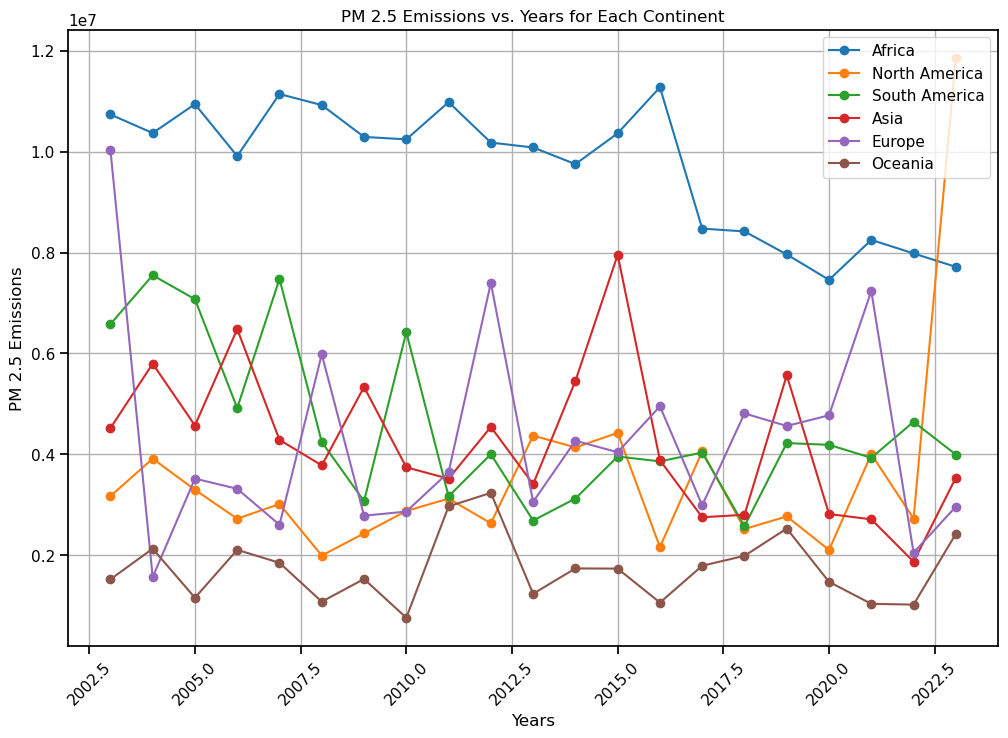

In [102]:
import matplotlib.pyplot as plt

# Create a figure to hold all the plots
plt.figure(figsize=(12, 8))

# Plotting PM 2.5 emissions for each continent
for continent, df_pm25_emissions_by_continent in filtered_pm25_Emissions_by_continent.items():
    years = df_pm25_emissions_by_continent.columns[2:]
    emissions = df_pm25_emissions_by_continent.iloc[0, 2:].values.astype(float)  # Extracting emissions data
    plt.plot(years, emissions, marker='o', linestyle='-', label=continent)

plt.title('PM 2.5 Emissions vs. Years for Each Continent')
plt.xlabel('Years')
plt.ylabel('PM 2.5 Emissions')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()
